In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
titanic_data = pd.read_csv('titanic_dataset.csv')

In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_data.shape

(891, 12)

In [33]:
X = titanic_data[['Parch','Pclass','SibSp','Fare']]
y= titanic_data[['Survived']]


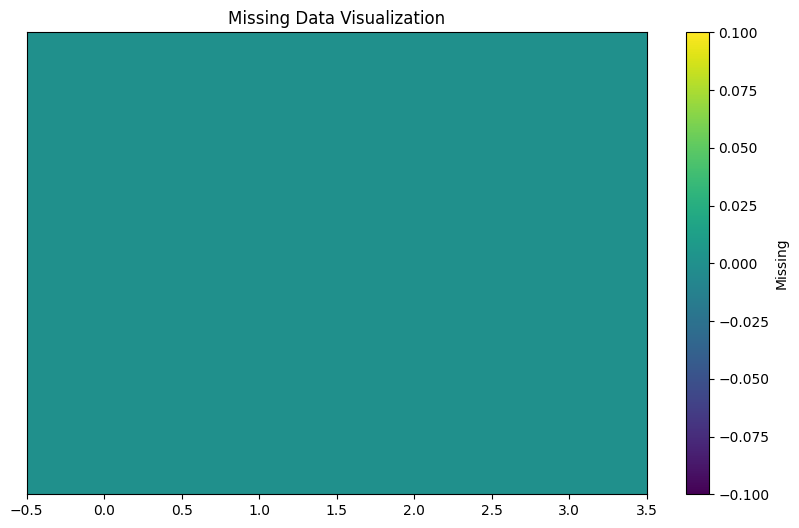

In [34]:
plt.figure(figsize=(10, 6))
plt.imshow(X.isnull(), aspect='auto')
plt.title('Missing Data Visualization')
plt.yticks([])
plt.colorbar(label='Missing')
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.601763
         Iterations 6


In [37]:
predictions = result.predict(sm.add_constant(X_test))
print(predictions)

709    0.273967
439    0.392600
840    0.249054
720    0.484504
39     0.220928
         ...   
433    0.248337
773    0.248427
25     0.542083
84     0.392600
10     0.275357
Length: 179, dtype: float64


In [38]:
predictions_binary = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
print(accuracy_score(y_test, predictions_binary))

0.7150837988826816


In [39]:
print(classification_report(y_test, predictions_binary))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       105
           1       0.70      0.54      0.61        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



In [40]:
# Family size
titanic_data['Family_Size'] = titanic_data['SibSp'] + titanic_data['Parch']

# Alone indicator
titanic_data['Alone'] = (titanic_data['Family_Size'] == 0).astype(int)

In [41]:
# Select relevant features and target variable
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Alone']]
y = titanic_data['Survived']

# Handle missing values
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Add constant term to the features for intercept
X = sm.add_constant(X)

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [43]:
# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
model = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.573571
         Iterations 12


In [44]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)

In [45]:
# Evaluate the model
print(accuracy_score(y_test, predictions_binary))

0.776536312849162
